In [0]:
## Setup
# !pip install pyspark

## Pandas vs. PySpark

In [2]:
## load the data
from google.colab import files
uploaded = files.upload()

Saving mtcars.csv to mtcars (2).csv


In [42]:
## Pandas
import pandas as pd
df1 = pd.read_csv("mtcars.csv")

# view dataframe
df1.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [43]:
## PySpark
# df2 = spark.read.csv("mtcasrs.csv") ## This will not work

from pyspark.sql import SparkSession # Spark settings

##### Spark settings
sc = SparkSession.builder.appName("income").getOrCreate()

df2 = sc.read.options(header=True, inferSchema=True) \
.csv("mtcars.csv")

# view dataframe
df2.show(5)

+-----------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|            model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-----------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|        Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|    Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|       Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|   Hornet 4 Drive|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|
|Hornet Sportabout|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|
+-----------------+----+---+-----+---+----+-----+-----+---+---+----+----+
only showing top 5 rows



In [44]:
## Pandas
print(df1.columns)
print(df1.dtypes)
print()
## PySpark
print(df2.columns)
print(df2.dtypes)

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')
model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
[('model', 'string'), ('mpg', 'double'), ('cyl', 'int'), ('disp', 'double'), ('hp', 'int'), ('drat', 'double'), ('wt', 'double'), ('qsec', 'double'), ('vs', 'int'), ('am', 'int'), ('gear', 'int'), ('carb', 'int')]


### Rename Columns

In [45]:
## Rename Columns

## Pandas
df1.columns = ['model', 'mpg_check', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', \
       'gear', 'carb']
df1_new = df1.rename(columns = {'cyl':'cylinder'})
print(df1_new.columns)
print()


## PySpark
df2_new = df2.toDF('model', 'mpg_check', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', \
'gear', 'carb')
df2_new = df2_new.withColumnRenamed('cyl', 'cylinder')
print(df2_new.columns)


Index(['model', 'mpg_check', 'cylinder', 'disp', 'hp', 'drat', 'wt', 'qsec',
       'vs', 'am', 'gear', 'carb'],
      dtype='object')

['model', 'mpg_check', 'cylinder', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']


### Drop Column

In [46]:
## Pandas
df1 = df1.drop('model', axis=1)
# check
print(df1.columns)

## PySpark
df2 = df2.drop('model')
print(df2.columns)

Index(['mpg_check', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')
['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']


## Filtering

In [47]:
## Pandas
df1[df1["mpg_check"] < 20].head()

,mpg_check,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
4,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
9,19.2,6,167.6,123,3.92,3.44,18.30,1,0,4,4
10,17.8,6,167.6,123,3.92,3.44,18.90,1,0,4,4


In [48]:
df1[(df1["mpg_check"] < 20) & (df1["cyl"] == 6)]

,mpg_check,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
9,19.2,6,167.6,123,3.92,3.44,18.30,1,0,4,4
10,17.8,6,167.6,123,3.92,3.44,18.90,1,0,4,4
29,19.7,6,145.0,175,3.62,2.77,15.50,0,1,5,6


In [49]:
## PySpark
df2[df2["mpg"] < 20].show(5)

+----+---+-----+---+----+----+-----+---+---+----+----+
| mpg|cyl| disp| hp|drat|  wt| qsec| vs| am|gear|carb|
+----+---+-----+---+----+----+-----+---+---+----+----+
|18.7|  8|360.0|175|3.15|3.44|17.02|  0|  0|   3|   2|
|18.1|  6|225.0|105|2.76|3.46|20.22|  1|  0|   3|   1|
|14.3|  8|360.0|245|3.21|3.57|15.84|  0|  0|   3|   4|
|19.2|  6|167.6|123|3.92|3.44| 18.3|  1|  0|   4|   4|
|17.8|  6|167.6|123|3.92|3.44| 18.9|  1|  0|   4|   4|
+----+---+-----+---+----+----+-----+---+---+----+----+
only showing top 5 rows



In [50]:
df2[(df2["mpg"] < 20) & (df2["cyl"] == 6)].show()

+----+---+-----+---+----+----+-----+---+---+----+----+
| mpg|cyl| disp| hp|drat|  wt| qsec| vs| am|gear|carb|
+----+---+-----+---+----+----+-----+---+---+----+----+
|18.1|  6|225.0|105|2.76|3.46|20.22|  1|  0|   3|   1|
|19.2|  6|167.6|123|3.92|3.44| 18.3|  1|  0|   4|   4|
|17.8|  6|167.6|123|3.92|3.44| 18.9|  1|  0|   4|   4|
|19.7|  6|145.0|175|3.62|2.77| 15.5|  0|  1|   5|   6|
+----+---+-----+---+----+----+-----+---+---+----+----+



### Add Column


In [51]:
## Pandas
df1["gpm"] = 1/df1["mpg_check"]
df1.head()

,mpg_check,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,gpm
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.047619
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.047619
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.043860
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.046729
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0.053476


In [52]:
## PySpark
df2 = df2.withColumn("gpm", 1/df2["mpg"])
df2.show(5)

+----+---+-----+---+----+-----+-----+---+---+----+----+--------------------+
| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|                 gpm|
+----+---+-----+---+----+-----+-----+---+---+----+----+--------------------+
|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|0.047619047619047616|
|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|0.047619047619047616|
|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|0.043859649122807015|
|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1| 0.04672897196261683|
|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|0.053475935828877004|
+----+---+-----+---+----+-----+-----+---+---+----+----+--------------------+
only showing top 5 rows



### Fill Nulls

In [0]:
## Pandas
df1 = df1.fillna(0) ## lot more options

In [0]:
## PySpark
df2 = df2.fillna(0)

## Aggregation

In [55]:
## Pandas 
df1.groupby(['cyl', 'gear']).agg({'mpg_check': 'mean', 'disp':'min'})

mpg_check   disp
cyl gear                  
4   3        21.500  120.1
    4        26.925   71.1
    5        28.200   95.1
6   3        19.750  225.0
    4        19.750  160.0
    5        19.700  145.0
8   3        15.050  275.8
    5        15.400  301.0

In [56]:
## PySpark
df2.groupby(['cyl', 'gear']).agg({'mpg': 'mean', 'disp':'min'}).show()

+---+----+------------------+---------+
|cyl|gear|          avg(mpg)|min(disp)|
+---+----+------------------+---------+
|  8|   3|15.050000000000002|    275.8|
|  6|   5|              19.7|    145.0|
|  8|   5|              15.4|    301.0|
|  4|   3|              21.5|    120.1|
|  6|   3|             19.75|    225.0|
|  4|   4|26.925000000000004|     71.1|
|  4|   5|              28.2|     95.1|
|  6|   4|             19.75|    160.0|
+---+----+------------------+---------+



### Standard Transformations

In [57]:
## Pandas
import numpy as np
df1["logdisp"] = np.log(df1["disp"])
df1.head()

,mpg_check,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,gpm,logdisp
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.047619,5.075174
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.047619,5.075174
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.043860,4.682131
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.046729,5.552960
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0.053476,5.886104


In [58]:
## PySpark
import pyspark.sql.functions as F
df2.withColumn("logdisp", F.log(df2["disp"])).show(5)

+----+---+-----+---+----+-----+-----+---+---+----+----+--------------------+-----------------+
| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|                 gpm|          logdisp|
+----+---+-----+---+----+-----+-----+---+---+----+----+--------------------+-----------------+
|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|0.047619047619047616|5.075173815233827|
|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|0.047619047619047616|5.075173815233827|
|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|0.043859649122807015| 4.68213122712422|
|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1| 0.04672897196261683|5.552959584921617|
|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|0.053475935828877004|5.886104031450156|
+----+---+-----+---+----+-----+-----+---+---+----+----+--------------------+-----------------+
only showing top 5 rows



### Row conditional statements

In [59]:
## Pandas
df1["cond"] = df1.apply(lambda r: 1 if r["mpg_check"] > 20 
                        else 3, axis=1)
df1.head()

,mpg_check,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,gpm,logdisp,cond
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.047619,5.075174,1
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.047619,5.075174,1
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.043860,4.682131,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.046729,5.552960,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0.053476,5.886104,3


In [60]:
## PySpark
import pyspark.sql.functions as F
df2.withColumn("cond", \
               F.when(df2["mpg"] > 20, 1) \
               .when(df2["cyl"] == 6, 2) \
               .otherwise(3)).show(5)

+----+---+-----+---+----+-----+-----+---+---+----+----+--------------------+----+
| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|                 gpm|cond|
+----+---+-----+---+----+-----+-----+---+---+----+----+--------------------+----+
|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|0.047619047619047616|   1|
|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|0.047619047619047616|   1|
|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|0.043859649122807015|   1|
|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1| 0.04672897196261683|   1|
|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|0.053475935828877004|   3|
+----+---+-----+---+----+-----+-----+---+---+----+----+--------------------+----+
only showing top 5 rows



### Python when Required

In [61]:
## Pandas
df1["disp1"] = df1["disp"].apply(lambda x: x+1)
df1.head()

,mpg_check,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,gpm,logdisp,cond,disp1
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.047619,5.075174,1,161.0
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.047619,5.075174,1,161.0
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.043860,4.682131,1,109.0
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.046729,5.552960,1,259.0
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0.053476,5.886104,3,361.0


In [0]:
## PySpark
import pyspark.sql.functions as F
from pyspark.sql.types import DoubleType
fn = F.udf(lambda x:x+1, DoubleType())
# df2.withColumn("disp1", fn(df2["disp"])).show(5)

### Note: This does not work

### Merge/Join Dataframes
        ## Pandas
        left.merge(right, on="key")
        left.merge(right, left_on='a', right_on='b')

        ## PySpark
        left.join(right, on="key")
        left.join(right, left.a == right.b)

### Pivot Table

```
## Pandas
pd.pivot_table(df, values = 'D', index=["A", "B"], columns=["C"], aggfunc=np.sum)

## PySpark
df.groupBy("A", "B").pivot("C").sum("D")
```



### Summary Statistics


In [63]:
## Pandas
df1.describe()

,mpg_check,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,gpm,logdisp,cond,disp1
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125,0.054227,5.284836,2.125000,231.721875
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152,0.016424,0.588276,1.008032,123.938694
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000,0.029499,4.264087,1.000000,72.100000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000,0.043860,4.794340,1.000000,121.825000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000,0.052083,5.268840,3.000000,197.300000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000,0.064834,5.786022,3.000000,327.000000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000,0.096154,6.156979,3.000000,473.000000


In [65]:
## PySpark
# df2.describe().show()

df2.selectExpr("percentile_approx(mpg, array(.25, .5, .75)) as mpg").show()

+------------------+
|               mpg|
+------------------+
|[15.2, 19.2, 22.8]|
+------------------+



### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18c7bff240>,
      dtype=object)

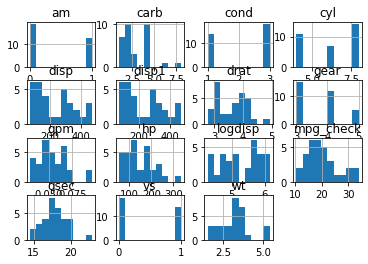

In [66]:
## Pandas
df1.hist()

In [0]:
## Pyspark
# df2.sample(False, 0.1).toPandas().hist() ## does not work

## SQL

```
## Pandas
n/a

## PySpark
df.createOrReplaceTemp("foo")
df2 = spark.sql("select * from foo")

```

### Make Sure TO

```
- Use pyspark.sql.functions and other built in functions
- Use the same version of python and packages on cluster as driver
- Check out the UI at http://localhost:4040/
- Learn about SSH port forwarding
- Check out Spark MLlib  --- similar to Sckit-Learn
- RTFM: https://spark.apache.org/docs/latest/

```


### Things Not To Do

```
- Do not try to iterate through rows
- Do not hard code a master in your driver
        - Use spark-submit for that
- df.toPandas().head()
        - instead do: df.limit(5).toPandas()


```

### If Things Go Wrong
```
- Don't panic!
- Read the error
- Google it
- Search/Ask Stack Overflow (tag apache-spark_
- Search/Ask the user list: user@spark.apache.org
```
